# Create Environment

In [268]:
import numpy as np
import matplotlib.pyplot as plt
import emd

In [269]:
# run tests
emd.support.run_tests()

# 1: Demixing Nonstationary Coupled Oscillators

Summary of Exercise 1:
- Decompose signal into IMFs
- Compute the instantaneous phase, frequency, and amplitude of IMFs
- plot instantaneous frequency and amplitude of fast oscillation against phase of slow oscillation

### Exercise 1: Analyzing Oscillations with EMD and Hilbert Transform

This exercise will guide you through generating a signal with two oscillatory components, extracting Intrinsic Mode Functions (IMFs) using Empirical Mode Decomposition (EMD), and analyzing instantaneous frequencies and amplitudes using the Hilbert Transform.

### Step 1: Generate a Signal with Two Frequencies
1. Define a time vector `t` with a sampling rate of 1000 Hz and duration of 10 seconds.
2. Create a **slow frequency component** `if_slow` that oscillates around 5 Hz at 0.5 Hz with an amplitude of 2 Hz.
   - **Hint**: Use a sine function to modulate the frequency.
3. Use `if_slow` to compute the **instantaneous phase** `ip_slow` (wrap it to \([0, 2\pi]\)) and generate `slow_sig` with an amplitude of 5.

In [282]:
import numpy as np
import matplotlib.pyplot as plt

T = 10  # Duration in seconds
fs = 1000  # Sampling frequency in Hz
dt = 1 / fs
t = np.arange(0, T, dt)  # Time vector

# Generate slow frequency component
if_slow = 5 + 2 * np.sin(2 * np.pi * 0.5 * t)  # Frequency 1

# Instantaneous phase and slow signal
ip_slow = 2 * np.pi * np.cumsum(if_slow) * dt  # Integration for phase
ip_slow = np.mod(ip_slow, 2 * np.pi)  # Wrap phase [0, 2*pi]
amp_slow = 5
slow_sig = amp_slow * np.cos(ip_slow)  # Slow signal

### Step 2: Modulate and Combine a Fast Oscillation
1. Define a **fast frequency component** `if_fast` that oscillates around 25 Hz and is modulated by `ip_slow`.
   - **Hint**: Use `ip_slow` for phase-dependent modulation.
2. Define an amplitude modulation `amp_fast` that also depends on the slow phase.
3. Use `if_fast` to compute the **instantaneous phase** `ip_fast` and create the `fast_sig`.

4. Combine `slow_sig` and `fast_sig` to create the full signal `sig`. Define an array `imfs` that contains `fast_sig` and `slow_sig`.

In [285]:
# Modulate fast oscillation
amp_fast = 2 + 2 * np.sin(ip_slow + np.pi / 2)  # Fast amplitude modulation
if_fast = 25 + 0.5 * np.sin(ip_slow)  # Fast frequency modulation

# Instantaneous phase for fast component and fast signal
ip_fast = 2 * np.pi * np.cumsum(if_fast) * dt
fast_sig = amp_fast * np.cos(ip_fast)

# Combine signals
sig = slow_sig + fast_sig
imfs = np.array([fast_sig, slow_sig]).T

### Step 3: Plot Ground Truth IMFs

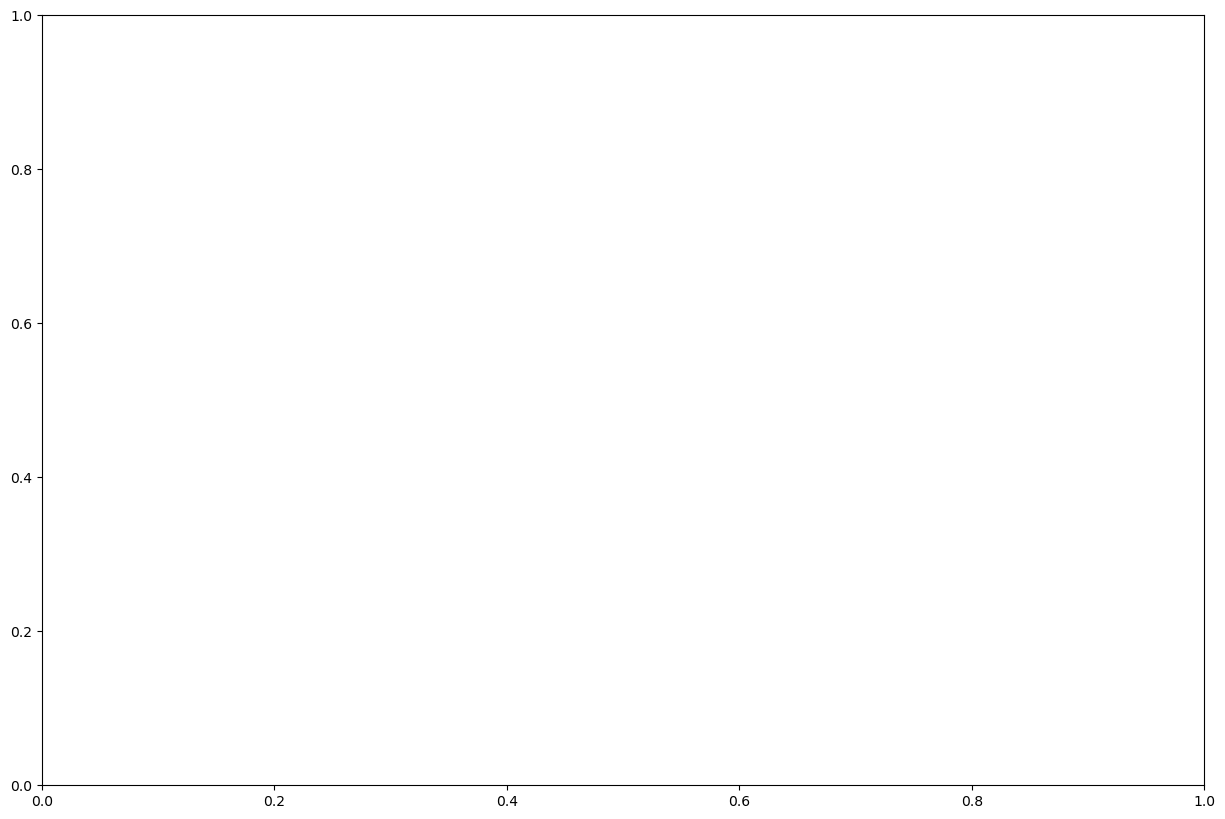

In [284]:
fig, ax = plt.subplots(figsize=(15, 10))
# Plot true IMFs with provided function
# Hint: Use `emd.plotting.plot_imfs(imfs, t, fig=fig, ax=ax)`
plt.show()


### Step 4: Extract IMFs with EMD
1. Use **EMD** to decompose `sig` into its IMFs.
   - **Hint**: Use `emd.sift.sift` to get the IMFs.

```python
# Decompose signal with EMD to get IMFs
# sig_imfs = emd.sift.sift(sig)
```

2. Plot the extracted IMFs using `emd.plotting.plot_imfs`.


### Step 5: Analyze with Hilbert Transform
1. Use the **Hilbert Transform** to get instantaneous **phase**, **frequency**, and **amplitude** for each IMF.
   - **Hint**: Use `emd.sift.frequency_transform`.
2. Calculate the **Hilbert-Huang Transform** (HHT) and plot it.
   - **Hint**: Use `emd.spectra.hilberthuang` and `emd.plotting.plot_hilberthuang`.

```python
# Apply Hilbert Transform to get instantaneous phase, frequency, and amplitude
# IP, IF, IA = emd.sift.frequency_transform(sig_imfs, fs, 'hilbert')

# Get the Hilbert-Huang transform and plot
# f, hht = emd.spectra.hilberthuang(IF, IA, edges=np.arange(1, 30, 0.5), sample_rate=fs, sum_time=False)
```


### Step 6: Modulation Analysis by Slow Phase
1. Plot the instantaneous frequency and amplitude of the fast oscillation as a function of the **slow phase**.
   - **Hint**: Use `plt.scatter` to visualize the relationship.

```python
fig = plt.figure()
# Hint: Use two subplots to plot `if_fast` and `amp_fast` as a function of `ip_slow`
fig.suptitle('Modulation of fast oscillation by slow oscillation')
plt.show()
```

---

Complete each step and refer to the hints to help you fill in the missing code. This exercise will give you a practical understanding of signal modulation, EMD, and the Hilbert Transform for instantaneous frequency and amplitude analysis.

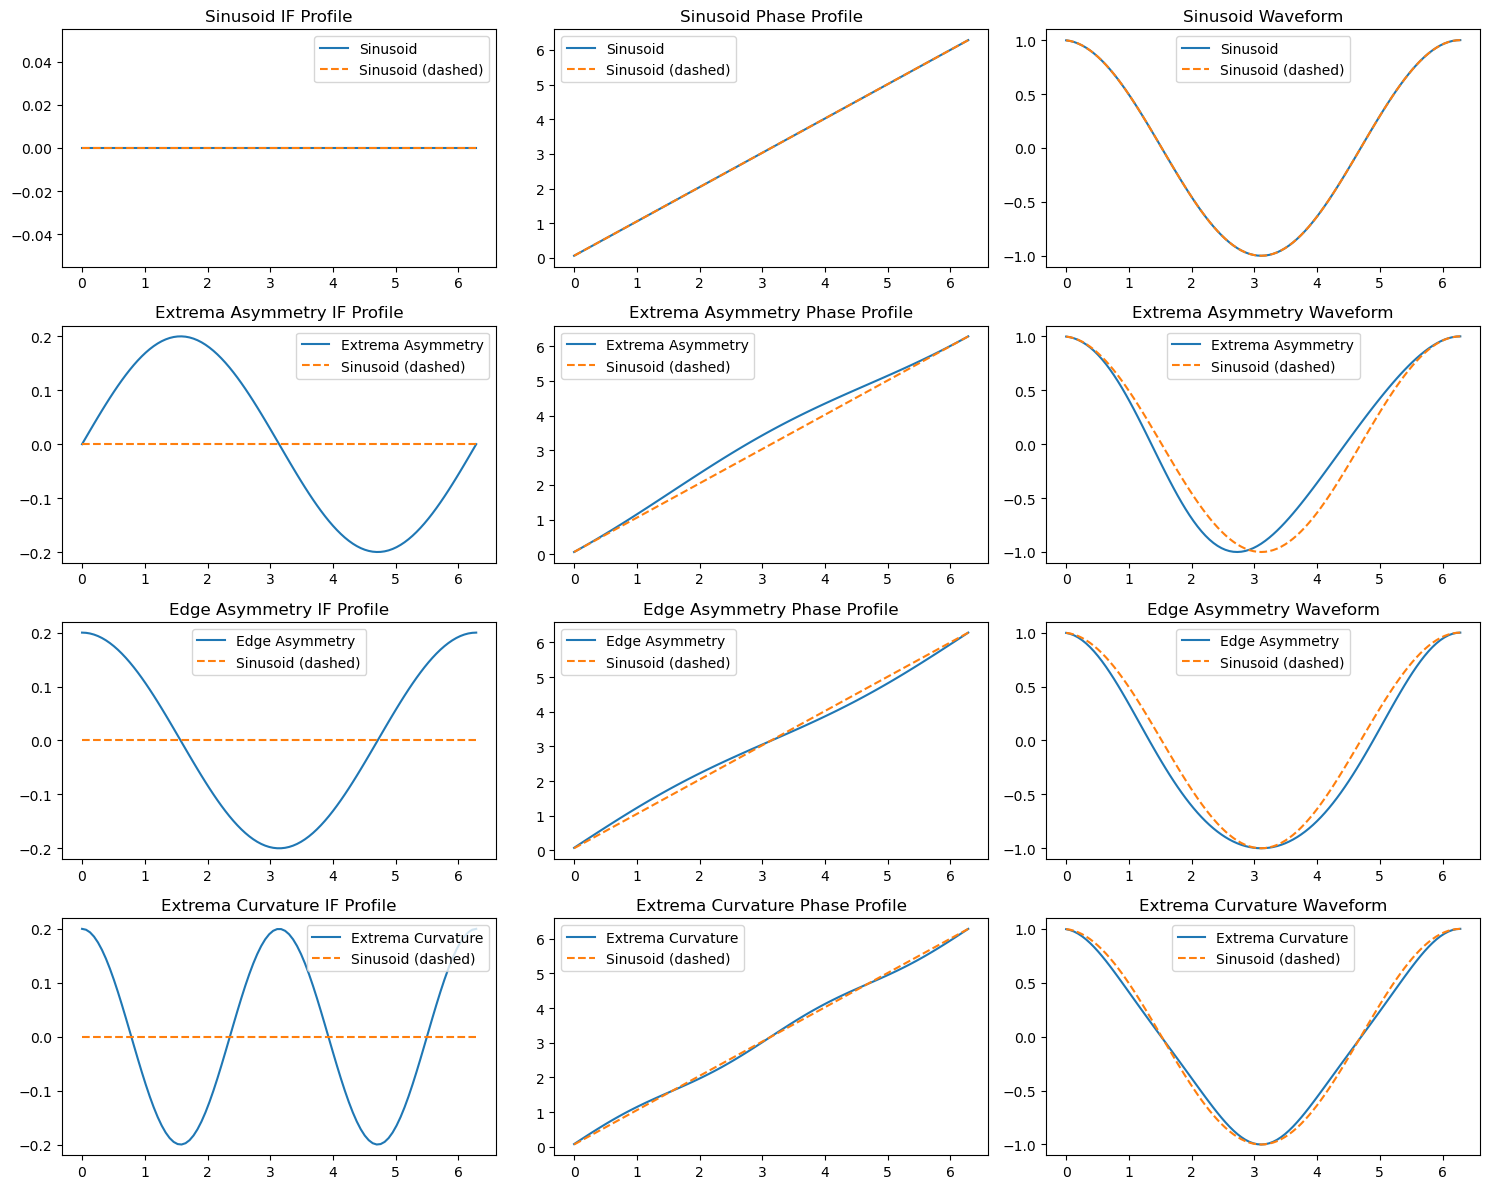

        PC1       PC2       PC3  Cluster
0  0.857385  0.770084 -0.676738        0
1  0.445024  0.297245 -0.403951        0
2  0.867644  0.630369 -0.633622        0
3  0.840507  0.559174 -0.725043        0
4  1.044619  0.272923 -0.155231        0


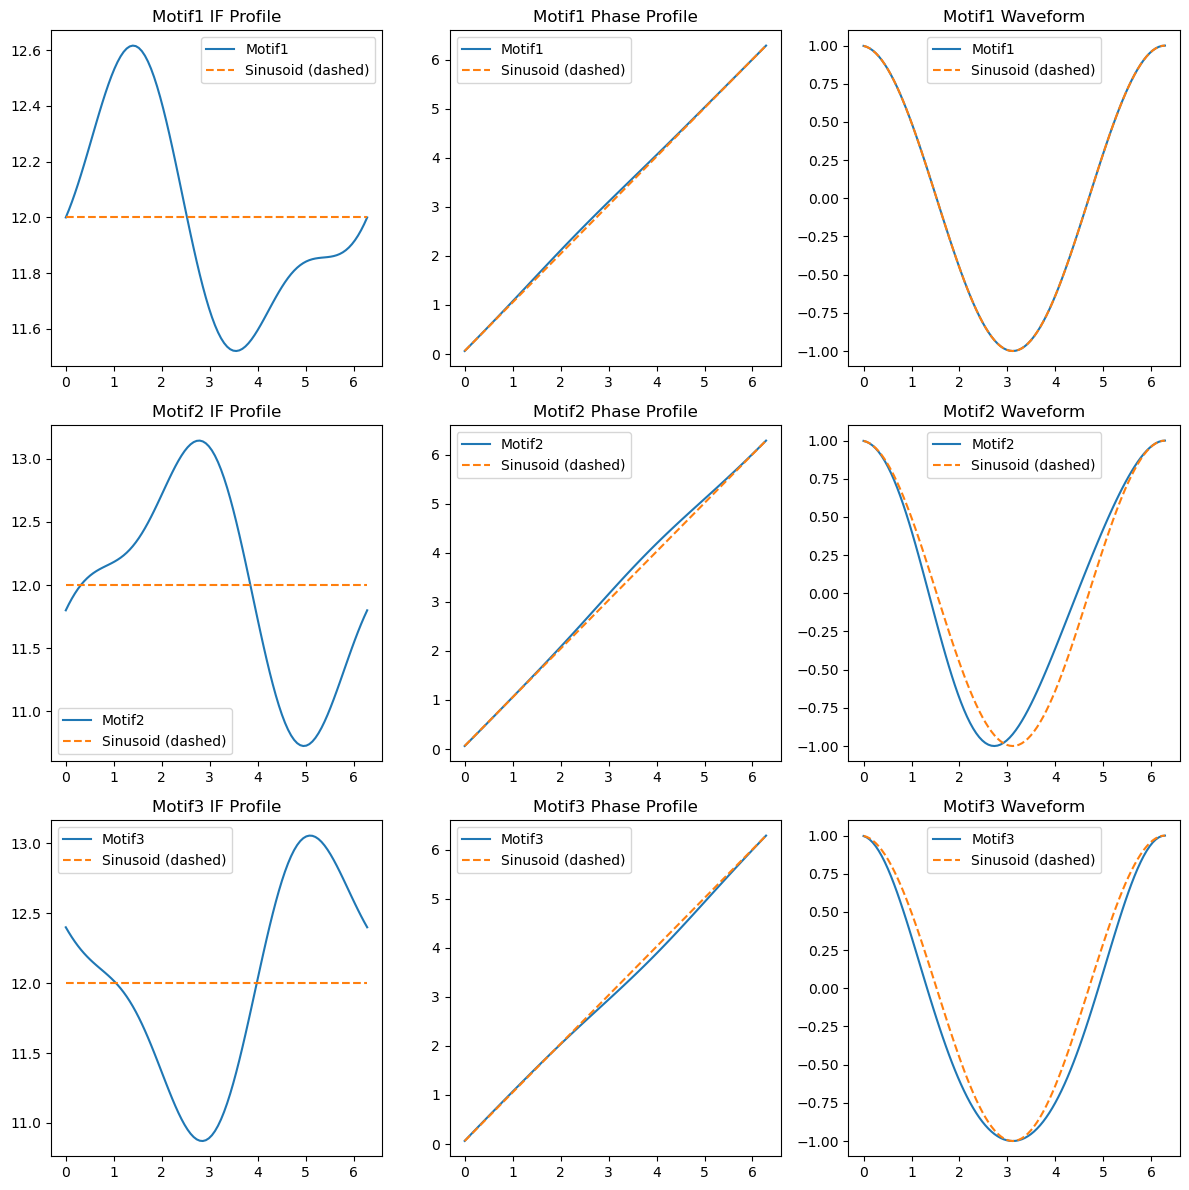

<Figure size 640x480 with 0 Axes>

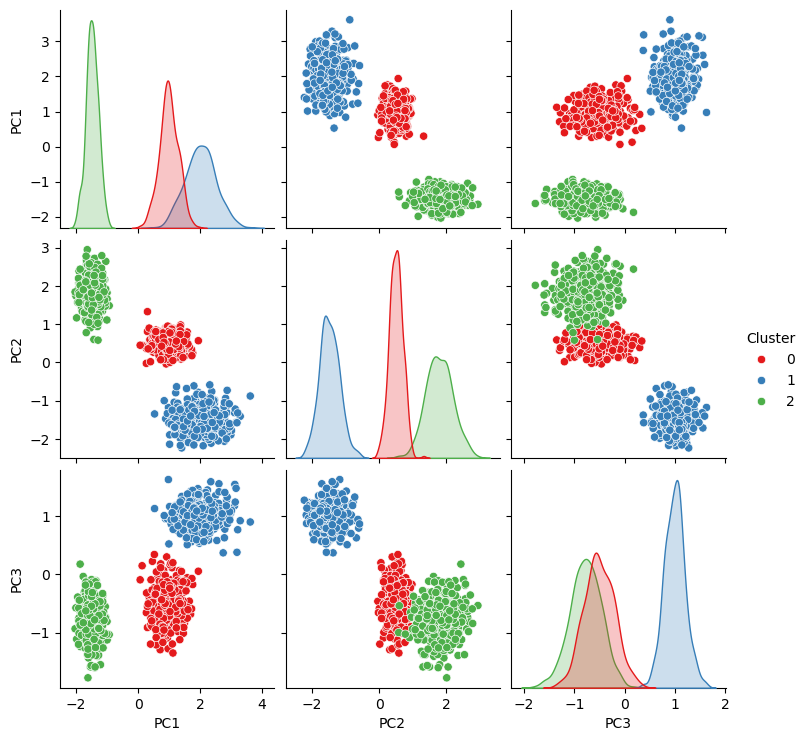

In [ ]:
# 2. Construct Signal with Waveform Motifs

# IF Motifs
# Define Instantaneous Frequency Profile Motifs And Get Corrseponding Waveforms

# a) reproduce Fig.2 from the paper
import numpy as np
import matplotlib.pyplot as plt

# Define phase grid
phase_grid = np.linspace(0, 2 * np.pi, 100)

# Function to calculate IF profile for a given motif
def calculate_IF_profile(motif, phase_grid):
    if motif == "sinusoid":
        return np.zeros_like(phase_grid)  # Sinusoid IF profile is constant
    elif motif == "extrema_asymmetry":
        return 0.2 * np.sin(phase_grid)
    elif motif == "edge_asymmetry":
        return 0.2 * np.cos(phase_grid)
    elif motif == "extrema_curvature":
        return 0.2 * np.cos(2 * phase_grid)
    else:
        raise ValueError("Unknown motif type")

# Function to calculate phase profile based on IF profile
def calculate_phase_profile(IF_profile):
    return np.cumsum(IF_profile) / np.sum(IF_profile) * 2 * np.pi

# Function to calculate waveform based on phase profile
def calculate_waveform(PF_profile):
    return np.cos(PF_profile)

# Motif types and corresponding profiles
motifs = ["sinusoid", "extrema_asymmetry", "edge_asymmetry", "extrema_curvature"]
IF_profiles = [calculate_IF_profile(motif, phase_grid) for motif in motifs]
PF_profiles = [calculate_phase_profile(1+IF) for IF in IF_profiles]
WF_profiles = [calculate_waveform(PF) for PF in PF_profiles]

# Sinusoid counterparts for plotting as dashed lines
sinusoid_IF = IF_profiles[0]
sinusoid_PF = PF_profiles[0]
sinusoid_WF = WF_profiles[0]



# a) Reprodue Fig.2 from the paper: plot the figure

# Adjusting the grid dimensions and indexing issues in plot layout

fig, axes = plt.subplots(4, 3, figsize=(15, 12))  # Switching to a 4x3 layout to fit all plots

# Updated titles for each row based on motif
plot_titles = ["IF Profile", "Phase Profile", "Waveform"]
motif_titles = ["Sinusoid", "Extrema Asymmetry", "Edge Asymmetry", "Extrema Curvature"]
plot_data = [(IF_profiles, sinusoid_IF), (PF_profiles, sinusoid_PF), (WF_profiles, sinusoid_WF)]

for i, motif in enumerate(motif_titles):
    for j, (profile, sinusoid_profile) in enumerate(plot_data):
        axes[i, j].plot(phase_grid, profile[i], label=motif)
        axes[i, j].plot(phase_grid, sinusoid_profile, linestyle="--", label="Sinusoid (dashed)")
        axes[i, j].set_title(f"{motif} {plot_titles[j]}")
        axes[i, j].legend()

plt.tight_layout()
plt.show()


# b) Gaussian Clusters in 3D principal axes states
# the IF profiles above, other than sinusoid, are what we use as our 3 principal axes
import numpy as np
import pandas as pd

# Parameters
n_pcs = 3        # Dimensionality of the space (3D)
n_clusters = 3   # Number of clusters
samples_per_cluster = 400
n_cycles = n_clusters * samples_per_cluster

# Define mean vectors and standard deviations for each cluster in 3D
cluster_means = [
    [1.0, 0.5, -0.5],
    [2.0, -1.5, 1.0],
    [-1.5, 1.8, -0.8]
]

cluster_stds = [
    [0.3, 0.2, 0.3],
    [0.5, 0.3, 0.2],
    [0.2, 0.4, 0.3]
]

# Generate samples for each cluster
clusters = [
    np.random.multivariate_normal(mean, np.diag(np.square(stds)), samples_per_cluster)
    for mean, stds in zip(cluster_means, cluster_stds)
]

# Combine all clusters into a single array and create labels
pc_components = np.array(IF_profiles[1:])
pc_scores = np.vstack(clusters)
cluster_labels = np.concatenate([[i] * samples_per_cluster for i in range(n_clusters)])

# Create a DataFrame with sample points and cluster labels
df = pd.DataFrame(pc_scores, columns=[f'PC{i+1}' for i in range(n_pcs)])
df['Cluster'] = cluster_labels

# Display the DataFrame
print(df.head())


# c) Reproduce Fig. 2 but now with the cluster means as the motifs
# map cluster mean to phase grid
sinusoid_IF = 12 * np.ones_like(phase_grid)
cluster_IF_motifs = 2 * np.array(cluster_means) @ pc_components + 12
cluster_IP_motifs = np.array([calculate_phase_profile(if_profile) for if_profile in cluster_IF_motifs])
cluster_WF_profiles = [calculate_waveform(PF) for PF in PF_profiles]

# Adjusting the grid dimensions and indexing issues in plot layout

fig, axes = plt.subplots(3, 3, figsize=(12, 12))  # Switching to a 4x3 layout to fit all plots

# Updated titles for each row based on motif
plot_titles = ["IF Profile", "Phase Profile", "Waveform"]
motif_titles = ["Motif1", "Motif2", "Motif3"]
plot_data = [(cluster_IF_motifs, sinusoid_IF), (cluster_IP_motifs, sinusoid_PF), (cluster_WF_profiles, sinusoid_WF)]

for i, motif in enumerate(motif_titles):
    for j, (profile, sinusoid_profile) in enumerate(plot_data):
        axes[i, j].plot(phase_grid, profile[i], label=motif)
        axes[i, j].plot(phase_grid, sinusoid_profile, linestyle="--", label="Sinusoid (dashed)")
        axes[i, j].set_title(f"{motif} {plot_titles[j]}")
        axes[i, j].legend()

plt.tight_layout()
plt.show()


# d) Plot the pairwise scatter plot of the clusters in PC space: hint: use seaborn pairplot
import seaborn as sns

# Plot the pairplot with Seaborn
plt.figure()
sns.pairplot(df, hue="Cluster", palette="Set1", diag_kind="kde")
plt.show()


# e) create design matrix from clusters (project from PC space to Instantaneous Frequency space)
IF_design_matrix = 2*(pc_scores @ pc_components) + 12
print(IF_design_matrix.shape) # (1200, 100) = (n_cycles, n_phase_bins)


# f) Distort Phase Alignment
# define a gaussian distribution with mean one and std 0.3
mean = 1
std = 0.1
distorted_nsamples = np.round(100 * np.random.normal(loc=mean, scale=std, size=(n_cycles))).astype(int)
# clip values to be within [50, 150]
distorted_nsamples = np.clip(distorted_nsamples, 50, 150)
fig = plt.figure()
plt.hist(distorted_nsamples, bins=20)
fig.suptitle('distortion factors distribution')
plt.show()

# 12 Hz oscillation, with fs=1200 has 100 samples per cycle

fs_ = 1200
n_phase_bins = 100
# resample signal into target distorted_nsamples
IF_design_matrix_resampled = np.ndarray(n_cycles, dtype=object)
from scipy.signal import resample
for i in range(n_cycles):
    IF_design_matrix_resampled[i] = resample(IF_design_matrix[i], distorted_nsamples[i])


# Plot design matrix
import numpy as np

# Assuming IF_design_matrix_resampled is a list of arrays with different lengths
n_cycles = len(IF_design_matrix_resampled)
max_sample = max(len(x) for x in IF_design_matrix_resampled)

# Pad each array with NaN to the maximum sample length
IF_design_matrix_resampled_padded = np.array([
    np.pad(x, (0, max_sample - len(x)), mode='constant', constant_values=np.nan) 
    for x in IF_design_matrix_resampled
])

# This will have shape (n_cycles, max_sample) and be padded with NaN values
print(IF_design_matrix_resampled_padded.shape)

import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot IF_design_matrix
im1 = axes[0].imshow(IF_design_matrix, aspect='auto')
axes[0].set_title('IF Design Matrix')
axes[0].set_xlabel('Phase Bins')
axes[0].set_ylabel('Cycles')
fig.colorbar(im1, ax=axes[0])  # Attach colorbar to the first subplot

# Plot IF_design_matrix_resampled_padded
im2 = axes[1].imshow(IF_design_matrix_resampled_padded, aspect='auto')
axes[1].set_title('IF Design Matrix Resampled')
axes[1].set_xlabel('Phase Bins')
axes[1].set_ylabel('Cycles')
fig.colorbar(im2, ax=axes[1])  # Attach colorbar to the second subplot

plt.tight_layout()
plt.show()

# sort by nsample
sorted_indices = np.argsort(distorted_nsamples)
IF_design_matrix_resampled_padded_sorted = IF_design_matrix_resampled_padded[sorted_indices]
distorted_nsamples_sorted = distorted_nsamples[sorted_indices]
IF_design_matrix_sorted = IF_design_matrix[sorted_indices]

# plot sorted
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot IF_design_matrix
im1 = axes[0].imshow(IF_design_matrix_sorted, aspect='auto')
axes[0].set_title('IF Design Matrix')
axes[0].set_xlabel('Phase Bins')
axes[0].set_ylabel('Cycles')
fig.colorbar(im1, ax=axes[0])  # Attach colorbar to the first subplot

# Plot IF_design_matrix_resampled_padded
im2 = axes[1].imshow(IF_design_matrix_resampled_padded_sorted, aspect='auto')
axes[1].set_title('IF Design Matrix Resampled')
axes[1].set_xlabel('Samples')
axes[1].set_ylabel('Cycles')
fig.colorbar(im2, ax=axes[1])  # Attach colorbar to the second subplot

plt.tight_layout()
plt.show()

In [ ]:
# # Concatenate cycles into signal
# concatenate cycles through stochastic linear combination of princial components

# concatenate
IF_all_cycles_mat = IF_design_matrix_resampled # (shuffle?)
IP_all_cycles_mat = np.array([calculate_phase_profile(if_prof_) for if_prof_ in IF_all_cycles_mat], dtype=object)

plt.figure()
plt.plot(IP_all_cycles_mat[0])
plt.plot(np.linspace(0, 2*np.pi, len(IP_all_cycles_mat[0])), '--')
plt.show()

IP_IMF_main = np.concatenate(IP_all_cycles_mat)
dt_  = 1/fs_
time_vect = np.arange(len(IP_IMF_main)) * dt_

# get signal
amp_IMF_main = 5
sig_IMF_main = amp_IMF_main * np.cos(IP_IMF_main)

%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt

# Define the colors to alternate
colors = ['b', 'r']

# Plot each segment with alternating colors
plt.figure()
start = 0
for i, length in enumerate(distorted_nsamples):
    end = start + length
    plt.plot(np.arange(start, end), sig_IMF_main[start:end], color=colors[i % 2])
    start = end

plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.title("Alternating Colored Segments")
plt.show()

# plot
plt.figure()
plt.plot(time_vect, sig_IMF_main)
plt.xlabel('Time (s)')
plt.ylabel('Signal')
plt.show()